# Regularization Demo
## Ridge, Lasso y Elastic Net
### 1. Cargamos librerías

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

### 2. Vemos qué pinta tiene el dataset

In [6]:
# Loading pre-defined Boston Dataset 
boston_dataset = datasets.load_boston() 
print(boston_dataset.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 3. Rápido análisis exploratorio para ver sus dependencias lineales

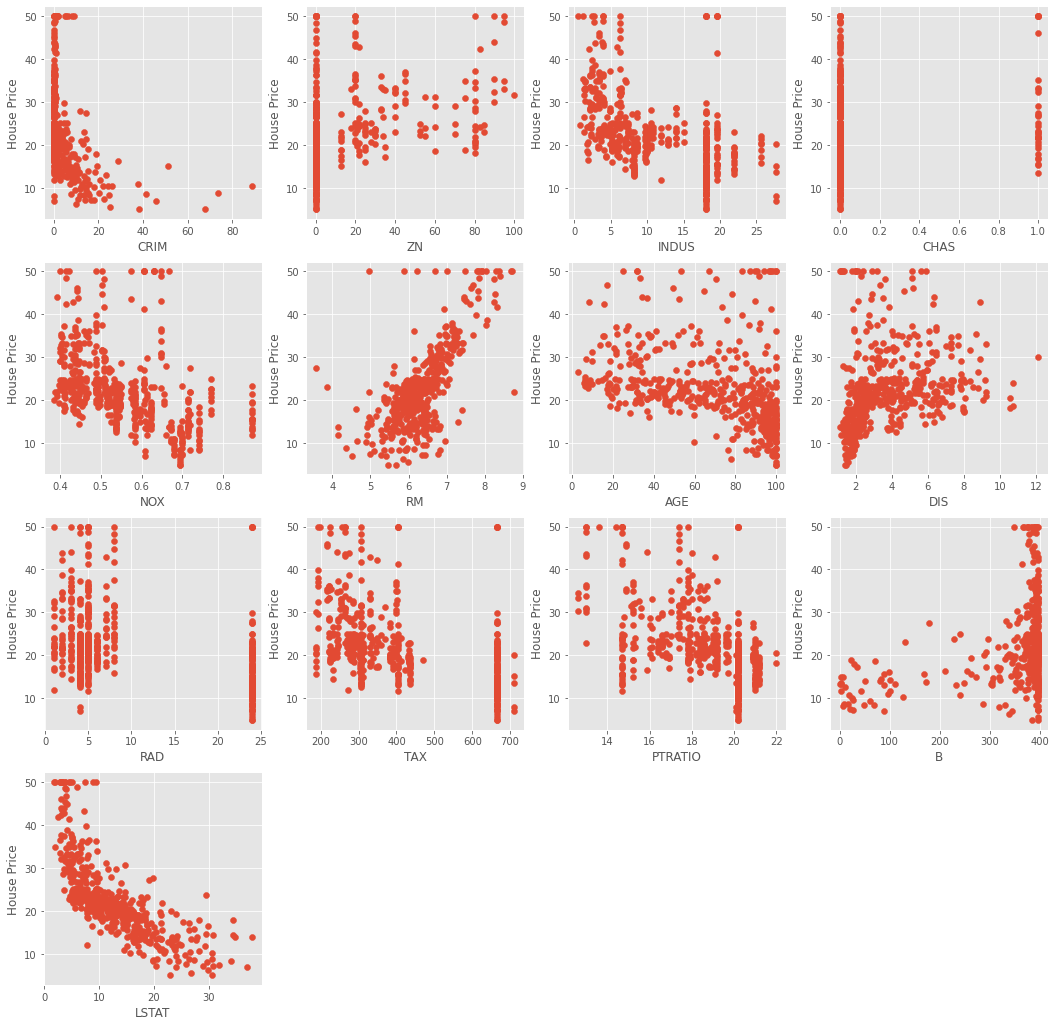

In [7]:
# Generate scatter plot of independent vs Dependent variable 
plt.style.use('ggplot') 
fig = plt.figure(figsize = (18, 18)) 
  
for index, feature_name in enumerate(boston_dataset.feature_names): 
    ax = fig.add_subplot(4, 4, index + 1) 
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target) 
    ax.set_ylabel('House Price', size = 12) 
    ax.set_xlabel(feature_name, size = 12) 

In [8]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 
  
# input  
X = boston_pd.iloc[:, :-1] 
  
#output 
Y = boston_pd.iloc[:, -1] 
  
print(boston_pd.head())

x_train, x_test, y_train, y_test = train_test_split( 
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],  
    test_size = 0.25, random_state=42) 
  
print("Train data shape of X = % s and Y = % s : "%( 
    x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    x_test.shape, y_test.shape)) 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  
Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


### 4. Preprocesado de los datos

In [9]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 
  
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 
  
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 
  
# Putting together the coefficient and their corrsponding variable names  
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

Mean squared Error on test set :  22.098694827098168
    Columns  Coefficient Estimate
0      CRIM             -0.128323
1        ZN              0.029552
2     INDUS              0.048859
3      CHAS              2.773503
4       NOX            -16.238829
5        RM              4.368755
6       AGE             -0.009248
7       DIS             -1.400867
8       RAD              0.257761
9       TAX             -0.009957
10  PTRATIO             -0.923123
11        B              0.013185
12    LSTAT             -0.517640


### 5. Regresión lineal múltiple

In [10]:
print("Coeficientes:", lreg.coef_)
print("Interceptor:", lreg.intercept_)

Coeficientes: [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Interceptor: 29.83642016383869


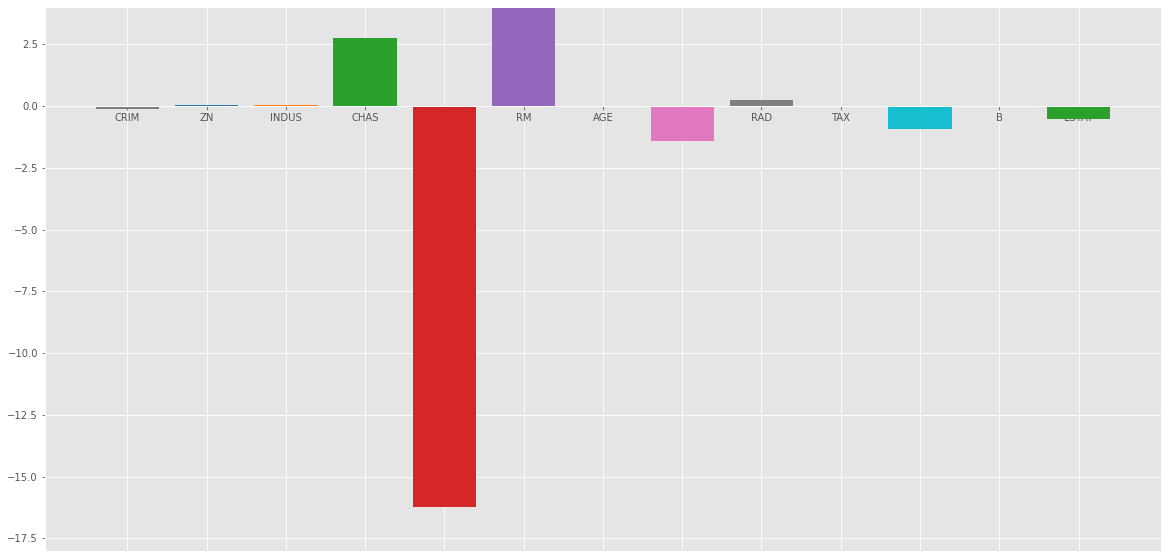

In [11]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lreg_coefficient["Columns"],  
lreg_coefficient['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-18,4])
  
plt.style.use('ggplot');


Pintamos los coeficientes para verlos mejor

### 6. Ridge regression

In [12]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculo el mse
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# coeficientes y los pinto
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = x_train.columns
ridge_coefficient['Coefficient Estimate'] = ridgeR.coef_
print(ridge_coefficient)

22.480475501233876
    Columns  Coefficient Estimate
0      CRIM             -0.123830
1        ZN              0.031392
2     INDUS              0.017677
3      CHAS              2.542772
4       NOX             -8.772492
5        RM              4.379802
6       AGE             -0.015373
7       DIS             -1.290861
8       RAD              0.244068
9       TAX             -0.010824
10  PTRATIO             -0.833466
11        B              0.013486
12    LSTAT             -0.534354


In [13]:
print("Coeficientes:", ridgeR.coef_)
print("Interceptor:", ridgeR.intercept_)

Coeficientes: [-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]
Interceptor: 24.878370472969365


Veamos en la gráfica cómo quedaría para alpha = 1

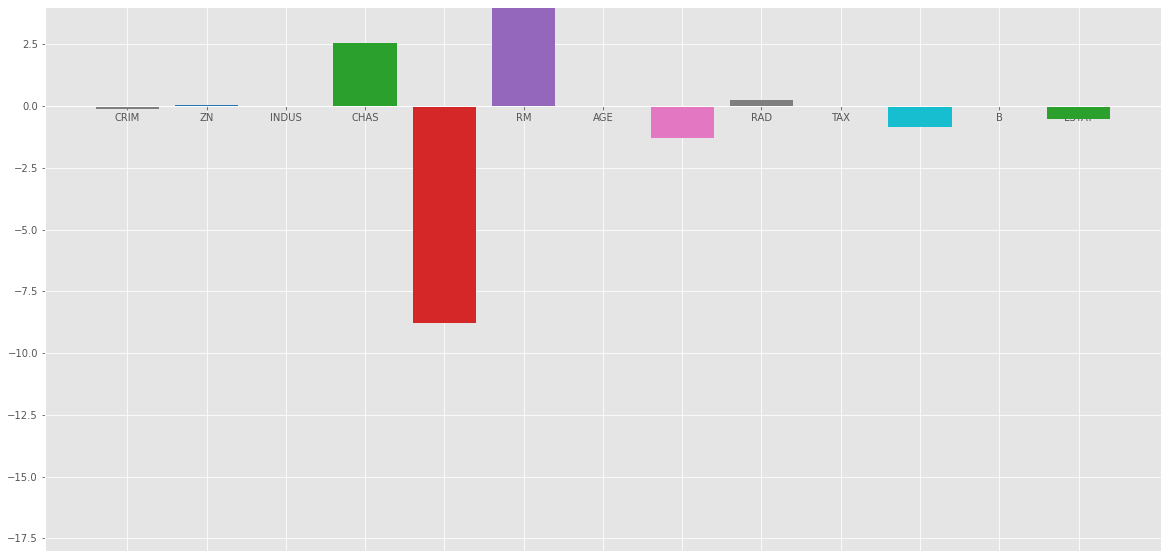

In [14]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(ridge_coefficient["Columns"],
      ridge_coefficient['Coefficient Estimate'],
      color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18, 4])

plt.style.use('ggplot')



Si hacemos ahora alpha = 10

In [15]:
ridgeR = Ridge(alpha = 10)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculo el mse
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# coeficientes y los pinto
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = x_train.columns
ridge_coefficient['Coefficient Estimate'] = ridgeR.coef_
print(ridge_coefficient)

22.939228679246245
    Columns  Coefficient Estimate
0      CRIM             -0.121375
1        ZN              0.034219
2     INDUS             -0.013070
3      CHAS              1.821026
4       NOX             -1.687473
5        RM              4.090102
6       AGE             -0.018418
7       DIS             -1.188068
8       RAD              0.243519
9       TAX             -0.012083
10  PTRATIO             -0.767179
11        B              0.013696
12    LSTAT             -0.573435


In [16]:
print("Coeficientes:", ridgeR.coef_)
print("Interceptor:", ridgeR.intercept_)

Coeficientes: [-0.12137453  0.03421897 -0.01307037  1.8210257  -1.68747299  4.09010212
 -0.01841796 -1.18806788  0.24351944 -0.01208251 -0.76717881  0.01369631
 -0.5734354 ]
Interceptor: 22.65220058517974


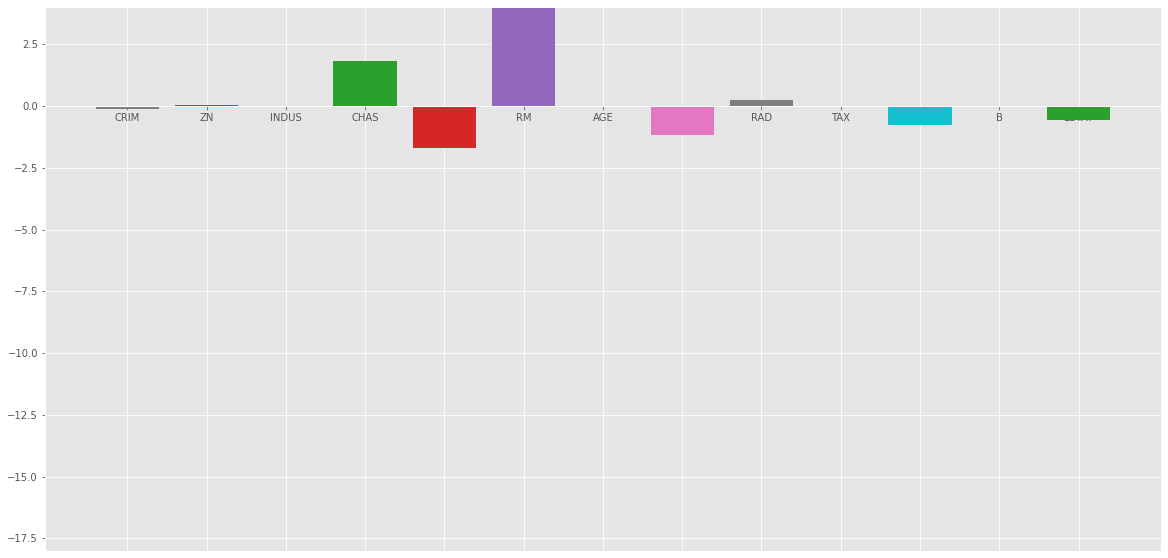

In [17]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 

ax.bar(ridge_coefficient["Columns"],
      ridge_coefficient['Coefficient Estimate'],
      color = color)

ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18, 4])

plt.style.use('ggplot')



### 7. Lasso regression

Mean squared error on test set 24.390752590355174
    Columns  Coefficient Estimate
0      CRIM             -0.083898
1        ZN              0.026461
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.545450
6       AGE              0.013458
7       DIS             -0.582829
8       RAD              0.207381
9       TAX             -0.011213
10  PTRATIO             -0.705006
11        B              0.011988
12    LSTAT             -0.757837


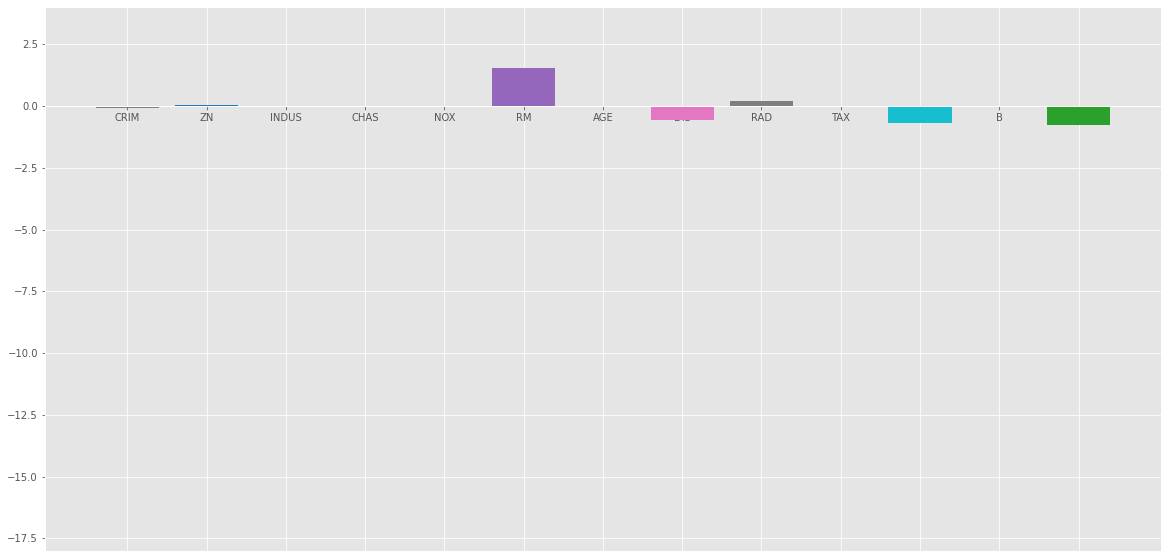

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-18,4])
  
plt.style.use('ggplot')


Mean squared error on test set 35.391737651173884
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.008066
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX              0.000000
5        RM              0.000000
6       AGE              0.000000
7       DIS             -0.000000
8       RAD              0.000000
9       TAX             -0.008968
10  PTRATIO             -0.000000
11        B              0.010140
12    LSTAT             -0.629870


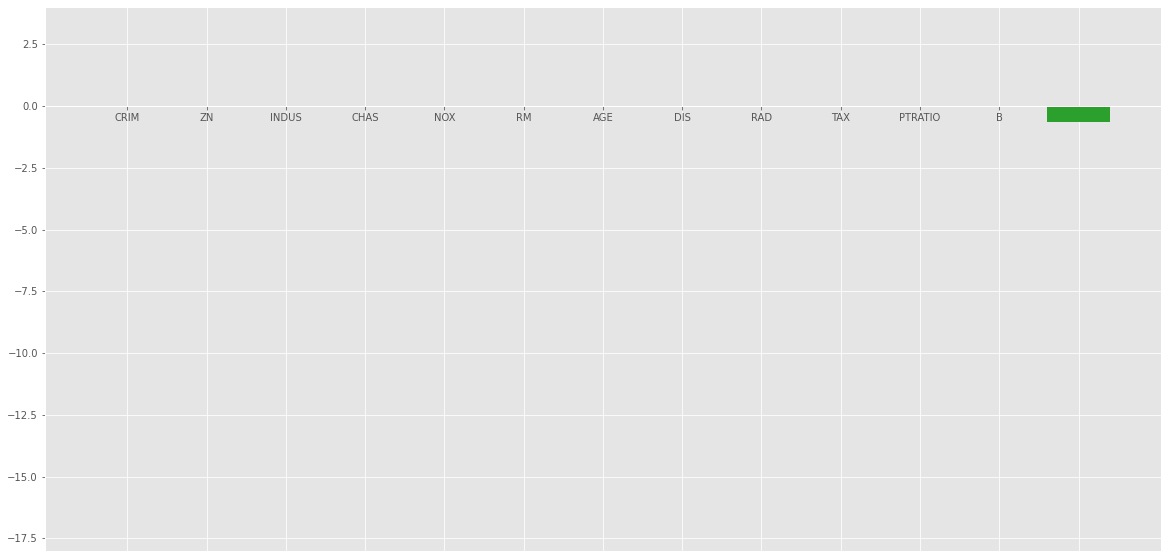

In [19]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 10) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18,4])
  
plt.style.use('ggplot')

### 8. Elastic Net

Mean Squared Error on test set 24.343817991716637


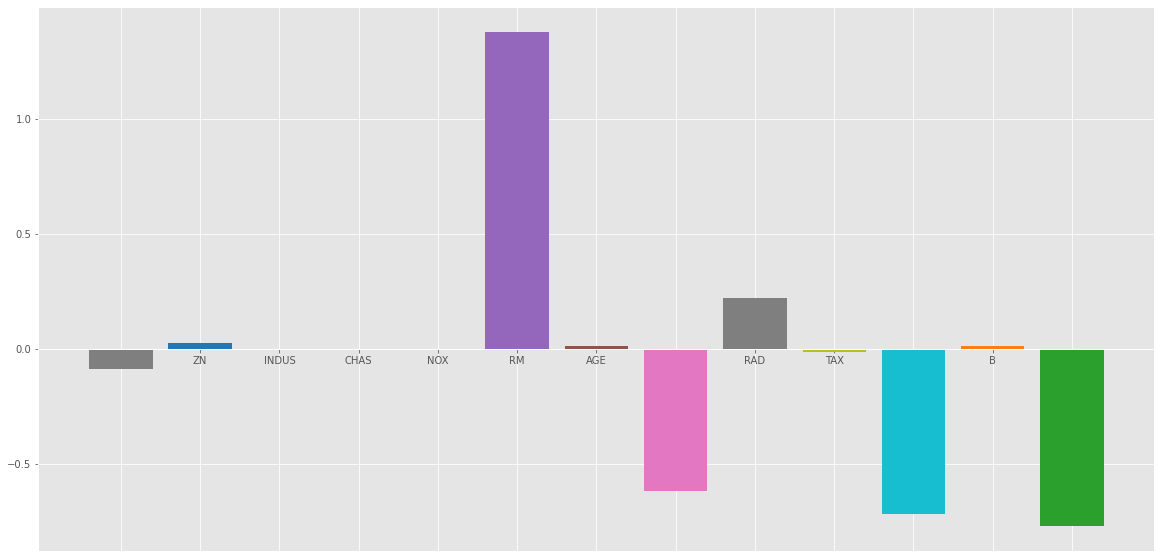

In [23]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(l1_ratio=0.9)
e_net.fit(x_train, y_train)
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(e_net_coeff["Columns"],  
e_net_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [24]:
from sklearn.model_selection import GridSearchCV

# defino el modelo
model = ElasticNet()

# defino el grid (rejilla)
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
grid['l1_ratio'] = np.arange(0.01, 0.1, 1)

# defino la busqueda
search = GridSearchCV(model, grid, scoring = 'neg_mean_squared_error', cv= 10, n_jobs=-1 )

# hago la busqueda
results = search.fit(x_train, y_train)

print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -24.368
Config: {'alpha': 1e-05, 'l1_ratio': 0.01}


Conclusion :
From the above analysis we can reach the following conclusion about different regularization methods:

Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.
Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.
Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.
Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.
